In [1]:
from matplotlib import pyplot as plt
import numpy as np
import missingno as msno
import scipy as sc
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] =  (20,7)

About this file
Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

In [2]:
df = pd.read_csv("./diabetes.csv")
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
497,2,81,72,15,76,30.1,0.547,25,0
474,4,114,64,0,0,28.9,0.126,24,0
524,3,125,58,0,0,31.6,0.151,24,0
253,0,86,68,32,0,35.8,0.238,25,0
399,3,193,70,31,0,34.9,0.241,25,1
744,13,153,88,37,140,40.6,1.174,39,0
607,1,92,62,25,41,19.5,0.482,25,0
324,2,112,75,32,0,35.7,0.148,21,0
400,4,95,64,0,0,32.0,0.161,31,1
714,3,102,74,0,0,29.5,0.121,32,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.nan)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
sns.pairplot(data=df,hue="Outcome")

In [ ]:
def show_information(col,h = "Outcome",):
    fig,axs = plt.subplots(nrows=1,ncols=2)
    axs[0].set_title(f"{col} colored by {h}")
    sns.histplot(data=df,x=col,hue=h,kde=True,multiple="layer",ax=axs[0])
    sns.histplot(data=df,x=col,hue=h,multiple="fill",ax=axs[1])

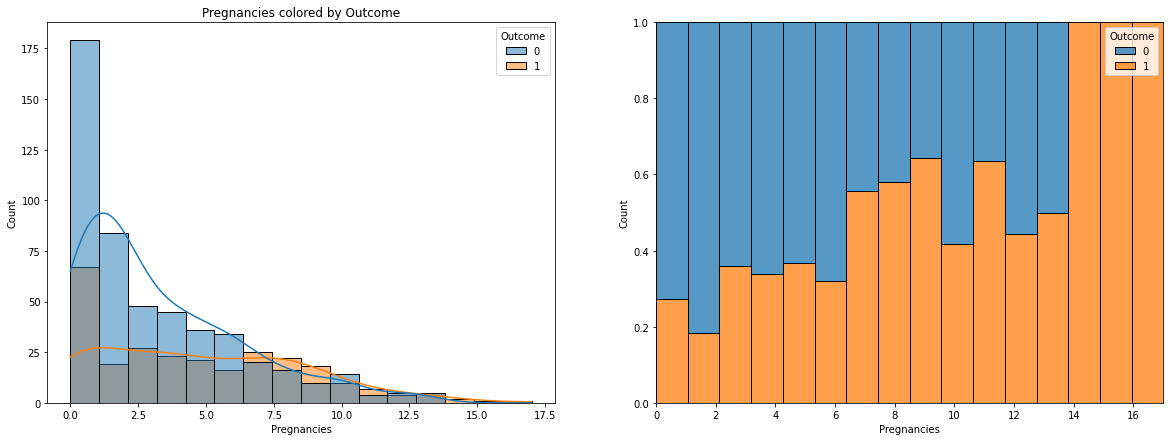

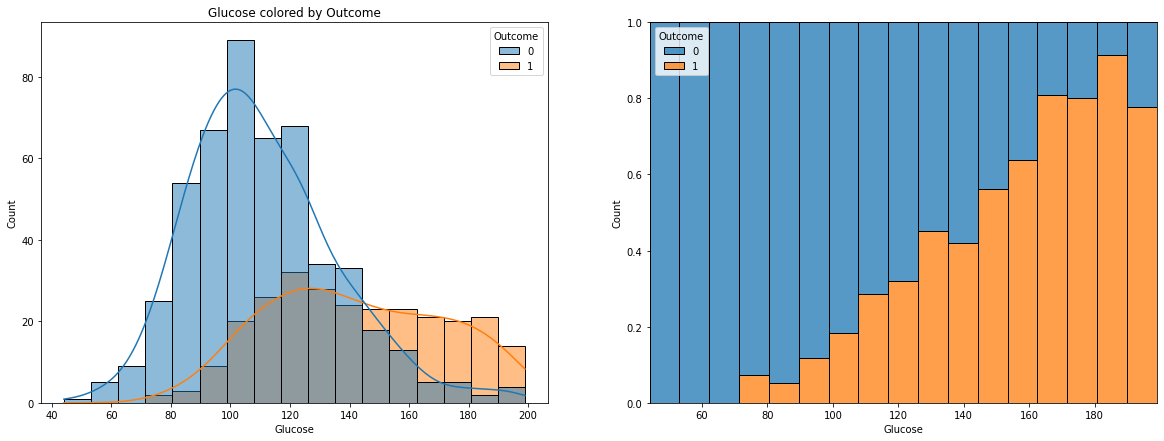

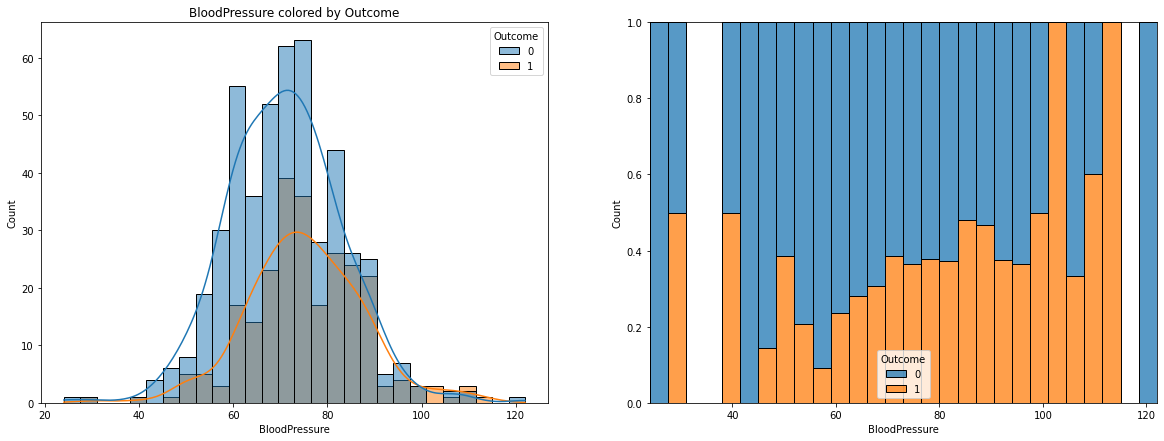

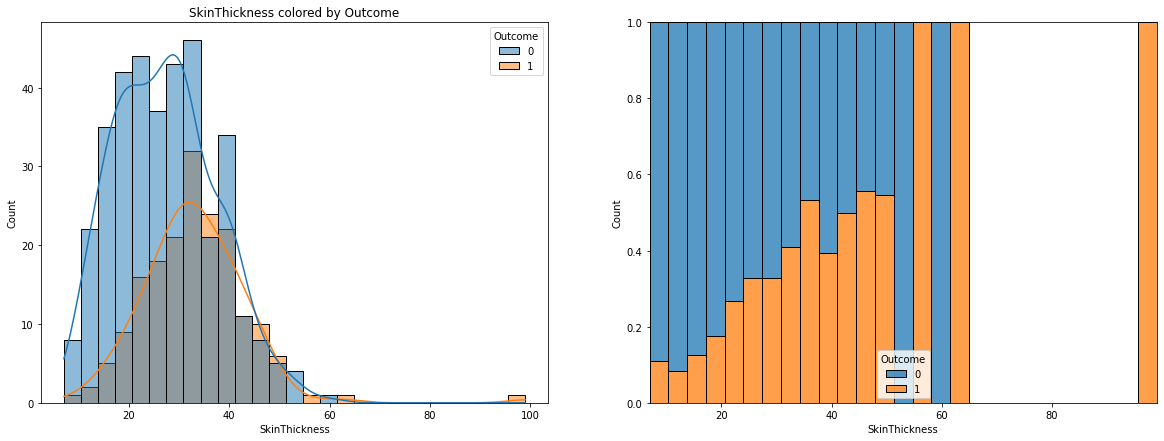

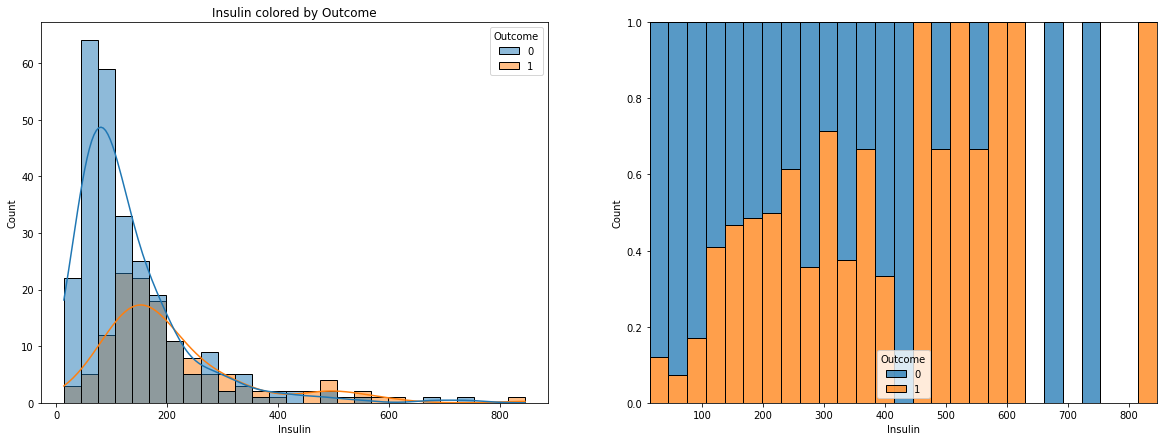

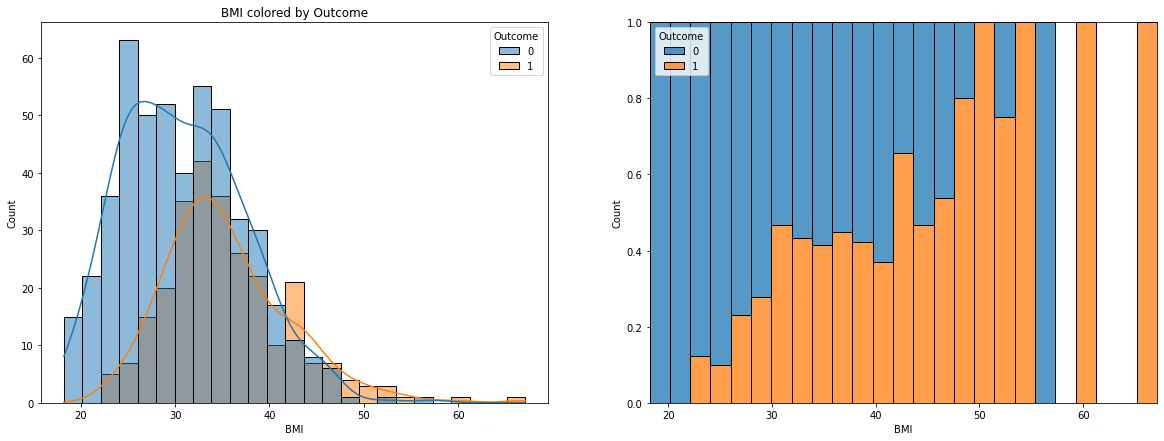

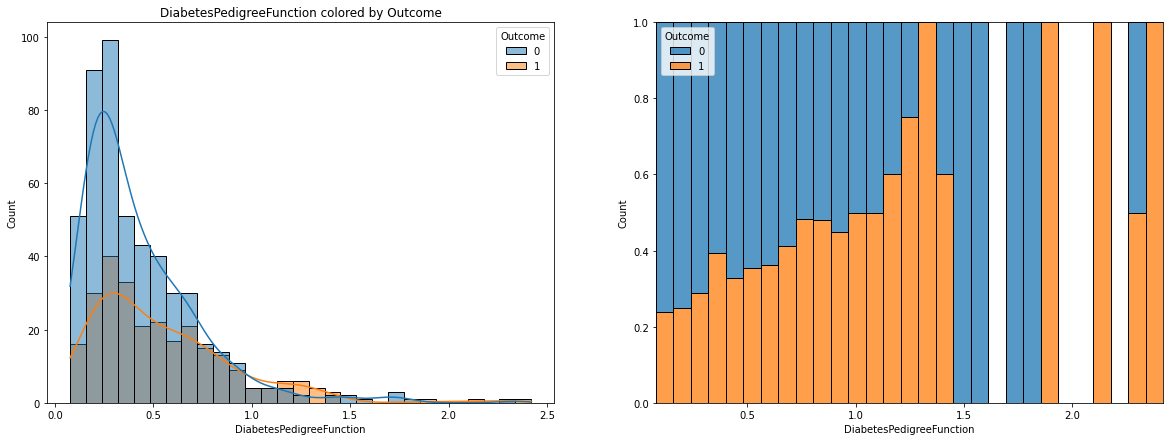

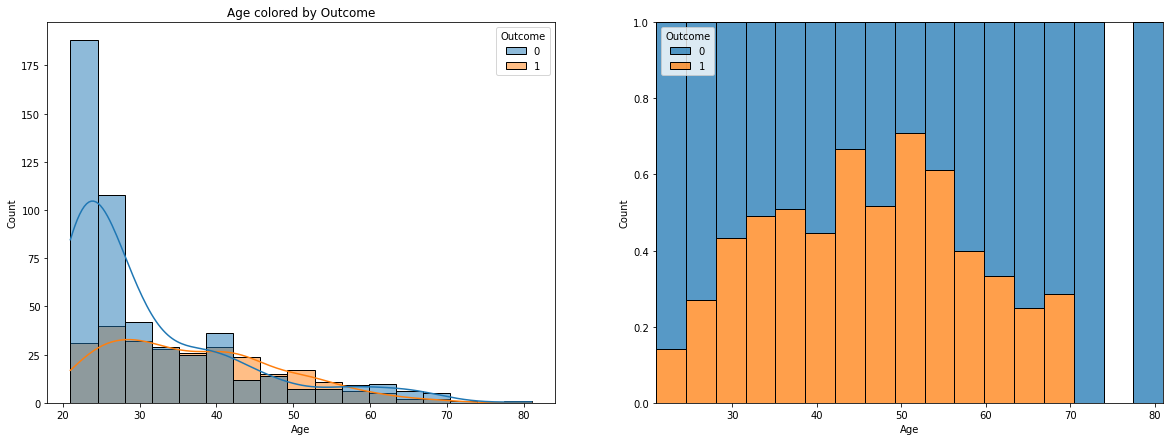

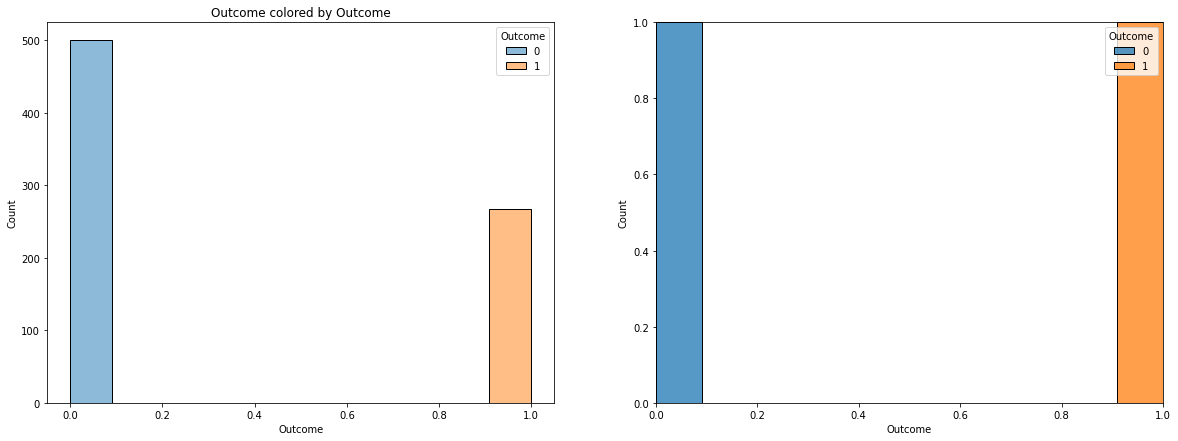

In [ ]:
for col in df.columns.values:
    show_information(col)

In [ ]:
df = df[df.BloodPressure > df.BloodPressure.quantile(0.03)]
df = df[df.Glucose > df.Glucose.quantile(0.03)]


In [ ]:
df.drop(df[((df[['Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']] > df[['Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].quantile(0.95)).sum(axis=1) > 0)].index,inplace=True)

In [ ]:
from sklearn.impute import KNNImputer


kn = KNNImputer()
df.loc[:,"Glucose":"DiabetesPedigreeFunction"] = kn.fit_transform(df.loc[:,"Glucose":"DiabetesPedigreeFunction"])

In [ ]:
df.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [ ]:
df["no_children"] = (df["Pregnancies"] <=6).astype("int64")

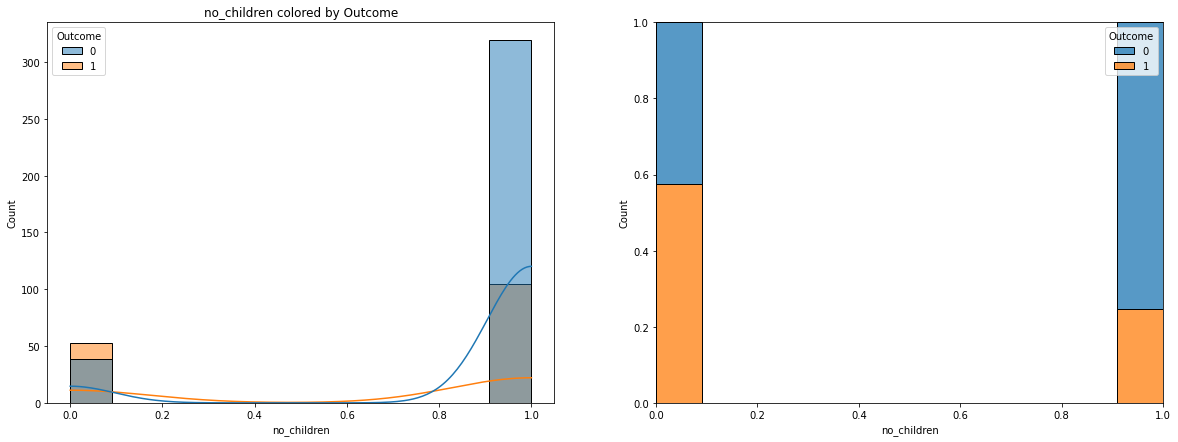

In [ ]:
show_information("no_children")

In [ ]:
df["ft1"] = df["Insulin"] *  np.power(df["BloodPressure"],1)

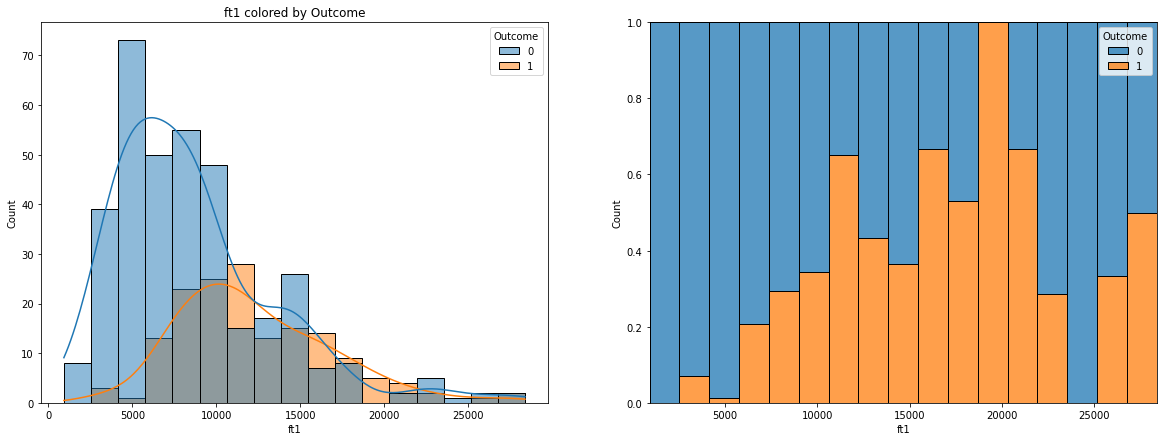

In [ ]:
show_information("ft1")

In [ ]:
df["ft2"] = df["Glucose"] /  np.power(df["BloodPressure"],0.5)

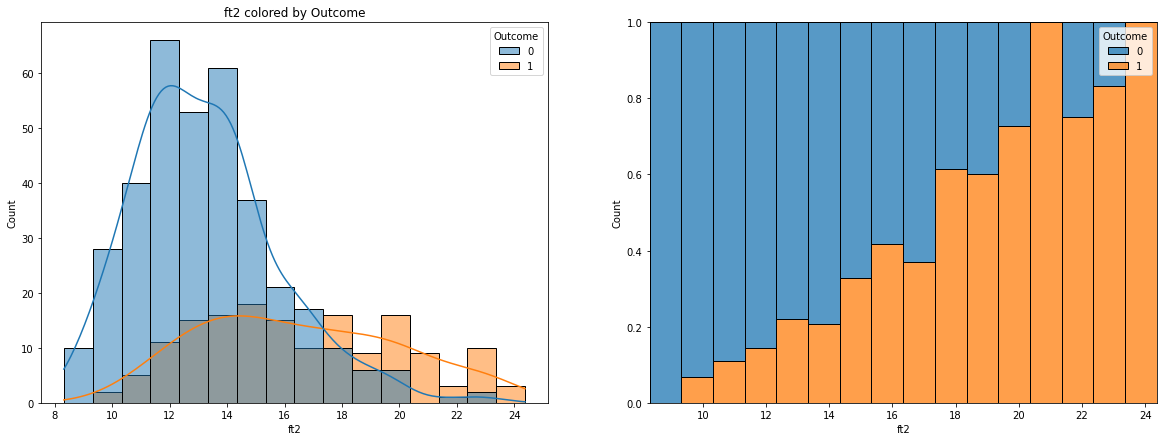

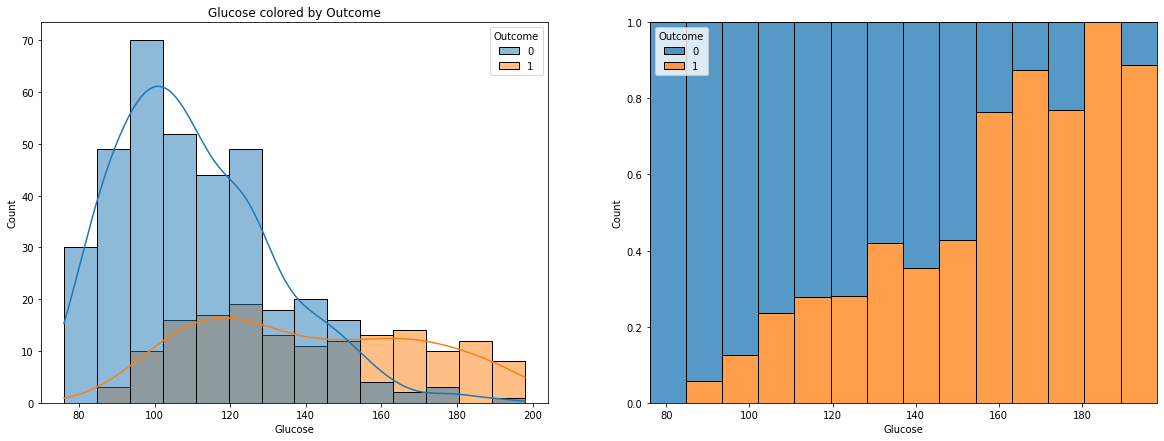

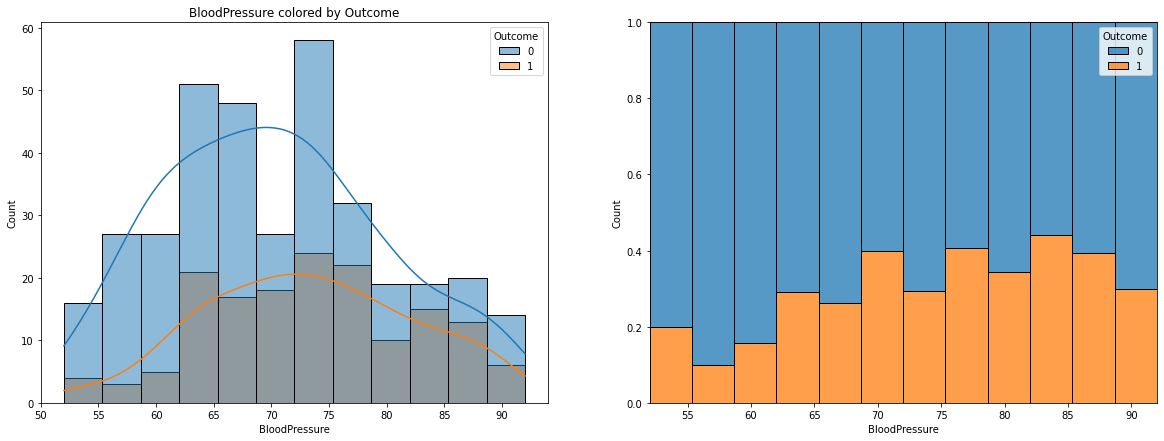

In [ ]:
show_information("ft2")
show_information("Glucose")
show_information("BloodPressure")

In [ ]:
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,get_scorer_names
from sklearn.impute import KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score,RandomizedSearchCV,GridSearchCV,cross_validate,train_test_split
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] =  (20,10)

In [ ]:
df = pd.read_csv("./diabetes.csv")
df.sample(10)

In [ ]:
df.drop(df[((df[['Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']] > df[['Pregnancies',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']].quantile(0.95)).sum(axis=1) > 0)].index,inplace=True)

In [ ]:
df = df[df.BloodPressure > df.BloodPressure.quantile(0.03)]
df = df[df.Glucose > df.Glucose.quantile(0.03)]


In [ ]:

class null_finder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X.replace(0,np.nan)
class custom_features(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        res = np.array([X[:,0] / np.sqrt(X[:,1]),X[:,0] * X[:,2]]).transpose()
        return res
class glucose_high(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return (X > 145).astype("int64").reshape(-1,1)
class no_children(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return (X <= 6).astype("int64").reshape(-1,1)

In [ ]:
clean_data = make_pipeline(
make_column_transformer(
    (null_finder(),list(range(1,8))),
    ("passthrough",[0])
),
make_column_transformer(
    (KNNImputer(),list(range(0,8)))
),
make_column_transformer(
    ("passthrough",list(range(0,8)))
),
make_column_transformer(
    (StandardScaler(),list(range(0,8)))
)
)
#0.84

In [ ]:
target = df["Outcome"]
inputs = clean_data.fit_transform(df)

In [ ]:
rnd = RandomForestClassifier(random_state=0,n_estimators=300,max_depth=40)

In [ ]:
cv_rf = pd.DataFrame(cross_validate(rnd,inputs,target,scoring=["f1","roc_auc","neg_log_loss","precision"],cv=20,n_jobs=-1))
cv_rf.mean()

In [ ]:
xgc = XGBClassifier(**{'subsample': 1.0,
 'n_estimators': 700,
 'min_child_weight': 10,
 'max_depth': 10,
 'learning_rate': 0.007,
 'gamma': 5,
 'colsample_bytree': 0.6})

In [ ]:
cv_xgc = pd.DataFrame(cross_validate(xgc,inputs,target,scoring=["f1","roc_auc","neg_log_loss","precision"],cv=20,n_jobs=-1))
cv_xgc.mean()

In [ ]:
from lazypredict.Supervised import LazyClassifier
res = []
for _ in range(100):
    lzc = LazyClassifier(False)
    X_test,X_valid,y_test,y_valid = train_test_split(inputs,target)
    models,preds = lzc.fit(X_test,X_valid,y_test,y_valid)
    res.append(models)

    


In [ ]:
res = pd.concat(res)

In [ ]:
summ = res.groupby("Model").agg(["mean","median","std"]).sort_values(("ROC AUC","mean"),ascending=False)
summ